# Libraries

In [32]:
import numpy as np
import scipy
from scipy import signal
import matplotlib.pyplot as plt
from pathlib import Path
import sys

root = str(Path().resolve().parent)
if root not in sys.path:
    sys.path.append(root)
print(*sys.path, sep="\n")

%matplotlib ipympl
# %matplotlib inline

/usr/lib/python312.zip
/usr/lib/python3.12
/usr/lib/python3.12/lib-dynload

/home/ryanwtsai/repos/rfdsp_sim/python/venv/lib/python3.12/site-packages
/home/ryanwtsai/repos/rfdsp_sim/python


In [2]:
from importlib import reload
from rfdsppy import calc, ofdm, rf_analog as rfa, rf_tx_fw, \
    tonegen, digital_filter_design, rx_dfe_impcomp as rx_impcomp, \
        digital_hw_algo as dighw, plotting

reload(calc)
reload(ofdm)
reload(rfa)
reload(rf_tx_fw)
reload(tonegen)
reload(digital_filter_design)
reload(rx_impcomp)
reload(dighw)
reload(plotting)

<module 'rfdsppy.plotting' from '/home/ryanwtsai/repos/rfdsp_sim/python/rfdsppy/plotting.py'>

# Linear-Phase FIR

In [3]:
# Generate sample waveform

nsym = 14
modorder = 64
bw = 20
scs = 15
num_sc = 1200
start_sc = 600-round(num_sc/2)
en_tprecode = False
osr = 8
wola = 1
wg = ofdm.OFDMWavGen(bw, scs, modorder, start_sc, num_sc=num_sc, en_tprecode=en_tprecode, osr=osr, wola=wola)

x, x_standard = wg.generate(nsym)
cfg = wg.get_demod_params()
fs = cfg.get("fs")
wola_len = cfg.get("wola_len")
print(f"Fs (MHz) = {fs}")

Fs (MHz) = 245.76


491195


(-100.0, 100.0)

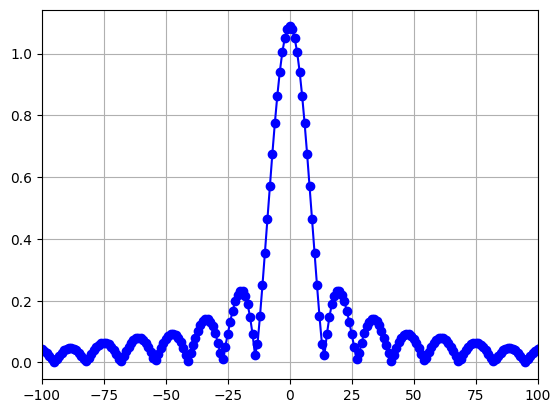

In [24]:
mode = "full"
corr = signal.correlate(x, x, mode=mode)
print(corr.size)
lags = signal.correlation_lags(x.size, x.size, mode=mode)

fig, ax = plt.subplots(dpi=100)
ax.plot(lags, np.abs(corr), 'bo-')
ax.grid()
ax.set_xlim(left=-100, right=100)

Normalized fpass = 0.0732421875
491195


(-100.0, 100.0)

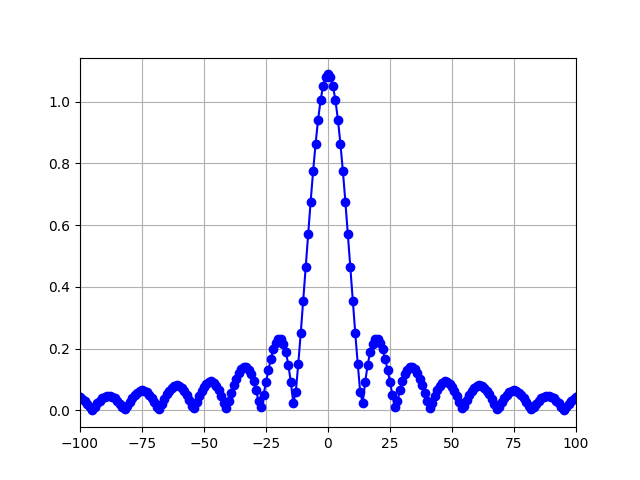

In [34]:
obw = num_sc*scs/1000
fpass = (obw/2)/(fs/2)
print(f"Normalized fpass = {fpass}")
fstop = 1-fpass
b = signal.firls(15, [0, fpass, fstop, 1], [1, 1, 0, 0])
# w, h = signal.freqz(b, fs=2)
# fig, ax = plt.subplots(dpi=100)
# ax.plot(w, 20*np.log10(np.abs(h)))

x_padded = np.concatenate((x, np.zeros(7)))
y = signal.lfilter(b, 1, x_padded)
y = y[7:]

mode = "full"
corr = signal.correlate(x, y, mode=mode)
print(corr.size)
lags = signal.correlation_lags(x.size, y.size, mode=mode)

fig, ax = plt.subplots(dpi=100)
ax.plot(lags, np.abs(corr), 'bo-')
ax.grid()
ax.set_xlim(left=-100, right=100)